<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EasyMoney---Data" data-toc-modified-id="EasyMoney---Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EasyMoney - Data</a></span></li><li><span><a href="#Librerías" data-toc-modified-id="Librerías-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Librerías</a></span></li><li><span><a href="#Tarea-1---Análisis" data-toc-modified-id="Tarea-1---Análisis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tarea 1 - Análisis</a></span><ul class="toc-item"><li><span><a href="#products" data-toc-modified-id="products-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>products</a></span><ul class="toc-item"><li><span><a href="#pk_partition" data-toc-modified-id="pk_partition-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>pk_partition</a></span></li><li><span><a href="#pk_cid" data-toc-modified-id="pk_cid-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>pk_cid</a></span></li><li><span><a href="#Evolución-temporal-de-la-cuenta" data-toc-modified-id="Evolución-temporal-de-la-cuenta-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Evolución temporal de la cuenta</a></span></li></ul></li></ul></li><li><span><a href="#sociodemographic" data-toc-modified-id="sociodemographic-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>sociodemographic</a></span></li><li><span><a href="#Anexos" data-toc-modified-id="Anexos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Anexos</a></span><ul class="toc-item"><li><span><a href="#Anexo-I.-Matriz-de-Ansoff-[3]" data-toc-modified-id="Anexo-I.-Matriz-de-Ansoff-[3]-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Anexo I. Matriz de Ansoff [3]</a></span><ul class="toc-item"><li><span><a href="#Estrategias-de-crecimiento-de-la-Matriz-de-Ansoff" data-toc-modified-id="Estrategias-de-crecimiento-de-la-Matriz-de-Ansoff-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Estrategias de crecimiento de la Matriz de Ansoff</a></span></li></ul></li></ul></li><li><span><a href="#Bibliografía" data-toc-modified-id="Bibliografía-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Bibliografía</a></span></li></ul></div>

<center><span style="background-color: rgb(251, 160, 38); font-size: 32px;">  <b>NUCLIO DIGITAL SCHOOL -</b> MASTER EN DATA SCIENCE  </span></center>
    
<br>
    
<center><a href = https://nuclio.school/wp-content/uploads/2019/10/nucleoDS-newBlack.png > <img src="https://nuclio.school/wp-content/uploads/2019/10/nucleoDS-newBlack.png" width=400 height=100><a/></center>

<hr style="height:5px;border-width:0;color:orange;background-color:orange">
<center> <span style="font-size: 26px;">  <b>Proyecto Final de Máster - EasyMoney </span> </center>

+ Sesion: **Análisis de datos**
+ Bloque: **Trabajo Fin de Máster**
+ Curso: **Data Science Madrid 0521**
+ Alumno 1: **Sergio Masa Avís**
+ Alumno 2: **María Andreu**

<br>

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

## EasyMoney - Data


En el directorio data/ se encuentran tres fuentes de información almacenadas en formato csv:
- products_df
- sociodemographic_df
- commercial_activity

A continuación, se muestra la descripción proporcionada de los datos proporcionada por el Director de IT de EasyMoney

<img src="img/data_description.png" width="800" height="400">


<hr style="height:5px;border-width:0;color:orange;background-color:orange">

## Librerías

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import warnings
warnings.filterwarnings("ignore")

init_notebook_mode(connected=True)  

pd.options.display.float_format = '{:,.3f}'.format

## Tarea 1 - Análisis

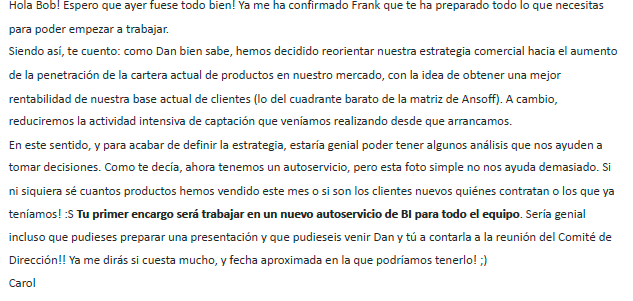

In [3]:
Image(filename='img/tarea_1_analisis.png')

### products

Descripción:

- __credit_card.__ Tarjetas de crédito
- __debit_card.__ Tarjetas de débito
- __em_account_p.__ Cuenta easyMoney+
- __em_account_pp.__ Cuenta easyMoney++
- __em_acount.__ Cuenta easyMoney
- __emc_account.__ Cuenta easyMoney Crypto
- __funds.__ Fondos de inversión
- __loans.__ Préstamos
- __long_term_deposit.__ Depósitos a largo plazo
- __mortgage.__ Mortgage
- __payroll.__ Domiciliaciones
- __payroll_account.__ Cuenta bonificada por domiciliaciones
- __pension_plan.__ Plan de pensiones
- __pk_cid.__ Identificador de cliente
- __pk_partition.__ Fecha de ingesta de los datos
- __securities.__ Valores
- __short_term_deposit.__ Short-term deposits

In [ ]:
df_products = pd.read_csv('data/products_df.csv', sep=',', encoding='utf-8-sig')
df_products.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_products.head()

In [ ]:
df_products.info()

In [ ]:
print('Valores nulos:', df_products.isna().any(), sep=2*'\n')

#### pk_partition

__pk_partition debe estar en formato fecha ya que indica la fecha de ingesta de los datos__

In [ ]:
df_products['pk_partition'] = pd.to_datetime(df_products.pk_partition, format='%Y-%m-%d')
df_products.sort_values('pk_partition', ascending=True, inplace=True)

In [ ]:
df_products.info()

__¿Cuantos datos se ingestaron cada día?__

In [ ]:
df_products.pk_partition.value_counts()

In [ ]:
n_particiones = df_products.pk_partition.value_counts().shape[0]
print(f'Número de particiones del histórico: {n_particiones}')

In [ ]:
from IPython.display import Image
Image(filename='img/frank_director_IT.png')

In [ ]:
%matplotlib inline
df_values = pd.DataFrame(df_products.pk_partition.value_counts(normalize=False))
df_values.reset_index(inplace=True)
df_values.columns=['pk_partition', 'value_counts']

# Plot
fig, ax1 = plt.subplots(figsize=(8,6))

_ = sns.barplot(x=df_values['pk_partition'], y=df_values['value_counts'], ax=ax1)

# Tick Params X Axis
ax1.tick_params(axis='x', rotation=90)

# Y Axis label
ax1.set_ylabel('Nº Datos Ingestados')

# Figure parameters
fig.tight_layout(pad=1)

del df_values

<div class="alert alert-block alert-info">
<b>Solicitud:</b> ¿Información anterior del backup?
</div>

<div class="alert alert-block alert-danger">
<b>Anotación:</b> ¿Porqué se ingestan menos datos con el paso de los días?
</div>

#### pk_cid

El identificador de cliente está almacenado en formato numérico, sin embargo, se cambiará a formato string.

In [ ]:
df_products.pk_cid = df_products.pk_cid.apply(str)

In [ ]:
df_products.info()

In [ ]:
n_clients_id = len(list(df_products.pk_cid.unique()))
print(f'Nº clientes: {n_clients_id}')

#### Evolución temporal de la cuenta 

Se analiza la evolución mensual de las siguientes cuentas:
- emc_account: Cuenta easyMoney crypto.
- em_acount: Cuenta easyMoney.
- em_account_p: Cuenta easyMoney +.
- em_account_pp: Cuenta easyMoney ++

In [ ]:
def dif_previous_month(df, by_col):
    columns = ['em_account', 'em_account_p', 'em_account_pp', 'emc_account']

    for col_name in columns:
        col_name_shift =  f'{col_name}_previous_month'
        df[col_name_shift] = df.groupby(by=by_col)[col_name].shift(1)
        
        col_name_dif = f'dif_{col_name}'
        df[col_name_dif] = df[col_name] - df[col_name_shift]
        
    return df

In [ ]:
df_products_sorted = df_products.sort_values(by=['pk_cid', 'pk_partition'], ascending=[True, True])
df_products_sorted.rename({'em_acount': 'em_account'}, axis=1, inplace=True)
df_analisis = dif_previous_month(df_products_sorted, by_col='pk_cid')
df_analisis.dropna(axis=0, inplace=True)

In [ ]:
df_analisis.head().T

In [ ]:
columns = ['dif_em_account', 'dif_em_account_p', 'dif_em_account_pp', 'dif_emc_account']

for col_name in columns:
    vc = df_analisis[col_name].value_counts()
    print(col_name, vc,sep='\n')
    print(5*'-', end=2*'\n')

In [ ]:
df_analisis['dif_em_account'] == -1

In [ ]:
df_analisis[df_analisis['dif_em_account'] == -1].pivot_table(index='pk_partition', 
                                          values=['dif_em_account', 'dif_em_account_p', 'dif_em_account_pp', 'dif_emc_account'], 
                                          aggfunc=[len])

## sociodemographic

Descripción:

- __pk_cid.__ Identificador de cliente
- __pk_partition.__ Fecha de ingesta de los datos
- __country_id.__ País de residencia del cliente
- __region_code.__ Provincia de residencia del cliente (para ES)
- __gender.__ Sexo del cliente
- __age.__ Edad del cliente
- __decreased__. Deceased index. N/S
- __salary__. Ingresos brutos de la unidad familiar

<div class="alert alert-block alert-info">
<b>Solicitud:</b> ¿Cómo se interpreta la columna 'decreased'?
</div>

In [ ]:
df_sociodemographic = pd.read_csv('data/sociodemographic_df.csv', sep=',', encoding='utf-8-sig')
df_sociodemographic.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_sociodemographic.info()

In [ ]:
df_sociodemographic['pk_cid'] = df_sociodemographic.pk_cid.apply(str)
df_sociodemographic['pk_partition'] = pd.to_datetime(df_sociodemographic.pk_partition, format='%Y-%m-%d')
df_sociodemographic['region_code'] = df_sociodemographic.region_code.apply(str)

In [ ]:
df_sociodemographic.info()

In [ ]:
df_sociodemographic.head()

In [ ]:
print('Valores nulos:', df_sociodemographic.isna().any(), sep=2*'\n')

In [ ]:
df_sociodemographic.country_id.value_counts()

<div class="alert alert-block alert-info">
<b>Solicitud:</b> ¿Cuáles son los códigos de países?
</div>

__Seleccionar el código ES__

In [ ]:
df_spain = df_sociodemographic[df_sociodemographic.country_id=='ES'].copy()

In [ ]:
df_spain.head()

__Codigo país ES -> region_code__

In [ ]:
df_spain.region_code.value_counts()

<div class="alert alert-block alert-info">
<b>Solicitud:</b> ¿Cuáles son las regiones de los paises?
</div>

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

## Anexos

### Anexo I. Matriz de Ansoff [3]


La Matriz de Ansoff, también denominada matriz producto-mercado, es una de las principales herramientas de estrategia empresarial y de marketing estratégico. Fue creada por el estratega Igor Ansoff en el año 1957. Esta matriz, es la herramienta perfecta para determinar la dirección estratégica de crecimiento de una empresa, por tanto solamente es útil para aquellas empresas que se han fijado objetivos de crecimiento.

La Matriz de Ansoff relaciona los productos con los mercados, clasificando al binomio producto-mercado en base al criterio de novedad o actualidad. Como resultado obtenemos 4 cuadrantes con información sobre cuál es la mejor opción a seguir: estrategia de penetración de mercados, estrategia de desarrollo de nuevos productos, estrategia de desarrollo de nuevos mercados o estrategia de diversificación.

<img src="img/matriz_ansoff.png" width="600" height="400">


#### Estrategias de crecimiento de la Matriz de Ansoff
- __Estrategia de penetración de mercados:__ esta primera opción consiste en ver la posibilidad de obtener una mayor cuota de mercado trabajando con nuestros productos actuales en los mercados que operamos actualmente. Para ello, realizaremos acciones para aumentar el consumo de nuestros clientes (acciones de venta cruzada), atraer clientes potenciales (publicidad, promoción) y atraer clientes de nuestra competencia (esfuerzos dirigidos a la prueba de nuestro producto, nuevos usos, mejora de imagen). Esta opción estratégica es la que ofrece mayor seguridad y un menor margen de error, ya que operamos con productos que conocemos, en mercados que también conocemos.

- __Estrategia de desarrollo de nuevos mercados:__ esta opción estratégica de la Matriz de Ansoff, plantea si la empresa puede desarrollar nuevos mercados con sus productos actuales. Para lograr llevar a cabo esta estrategia es necesario identificar nuevos mercados geográficos, nuevos segmentos de mercado y/o nuevos canales de distribución. Ejemplos de esta estrategia son: la expansión regional, nacional, internacional, la venta por canal online o nuevos acuerdos con distribuidores, entre otros.

- __Estrategia de desarrollo de nuevos productos:__ en esta opción estratégica, la empresa desarrolla nuevos productos para los mercados en los que opera actualmente. Los mercados están en continuo movimiento y por tanto en constante cambio, es totalmente lógico que en determinadas ocasiones sea necesario el lanzamiento de nuevos productos, la modificación o actualización de productos, para satisfacer las nuevas necesidades generadas por dichos cambios.

- __Estrategia de diversificación:__ por último en la estrategia de diversificación, es necesario estudiar si existen oportunidades para desarrollar nuevos productos para nuevos mercados. Esta estrategia es la última opción que debe escoger una empresa, ya que ofrece menor seguridad, puesto que cualquier empresa, cuanto más se aleje de su conocimiento sobre los productos que comercializa y los mercados donde opera, tendrá un mayor riesgo al fracaso.

Tal y como ya he mencionado anteriormente, el principal objetivo de la Matriz de Ansoff, es ayudar en la toma de decisiones sobre la expansión y el crecimiento estratégico de una empresa. Los tres primeros cuadrantes de la matriz (penetración de mercados, desarrollo de nuevos mercados y desarrollo de nuevos productos) corresponden a estrategias de crecimiento, mientras que el último cuadrante marca una estrategia de diversificación. Dependiendo del statu quo de cada empresa en el momento del análisis, la matriz permite escoger la opción estratégica que entraña un menor riesgo para su crecimiento. La matriz recomienda el siguiente orden de elección de la estrategia a implementar: en primer lugar la penetración de mercados, en segundo lugar el desarrollo de nuevos mercados, en tercer lugar el desarrollo de nuevos productos y en cuarto lugar la diversificación. Como se puede apreciar en la aplicación de la Matriz de Ansoff, toda empresa debe agotar todas las opciones de expansión antes de abordar una estrategia de diversificación.

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

## Bibliografía

- [1] Master en Data Science. Nuclio Digital School. Diapositivas del curso.

- [2] Hannan Satopay. The Ultimate Markdown Guide (for Jupyter Notebook). Medium. [url: https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd]

- [3] Roberto Espinosa. Matriz de Ansoff, estrategias de crecimiento. [url: https://robertoespinosa.es/2015/05/31/matriz-de-ansoff-estrategias-crecimiento]